# Transformer 1

## 복습용 큰 목차 정리
- Transformer는 기존 RNN의 어떤 문제를 어떻게 해결하였나?
- Q, K, V에서 차원에대한 고려, 어떤 차원은 같아야한다던지?
- 행렬 계산 부분 점검
- softmax로 확률값 계산 전에 dk의 루트로 나눠 주는것은 왜하나?

## 강의 소개
- Transformer(Self-Attention) : 현재 NLP 연구 분야에서 가장 많이 활용
- RNN 기반 번역 모델의 단점을 해결하기 위해 처음 등장
- 장점
    - Attention 연산만을 이용해 입력 문장/단어의 representation을 학습을 하며 좀 더 parallel한 연산이 가능한 동시에 학습 속도가 빠름

# Transformer
- Attention is all you need
    - 시퀀스 데이터를 입력 출력 처리를 할때 쓰는 RNN(LSTM, GRU)까지 걷어내고 Attention으로 대체할 수 있다는 의미를 담은 논문
- RNN의 문제
    - Long Trem Defendency가 발생함
    - 왼쪽에서 오른쪽으로 흘러가기 때문에 오른쪽 정보를 왼쪽에서 볼수 없음
        - Backward RNN을 생각해볼 수 있음 (Bi Directional RNNs 양쪽을 다 concat해서 고려할 수 있음)
        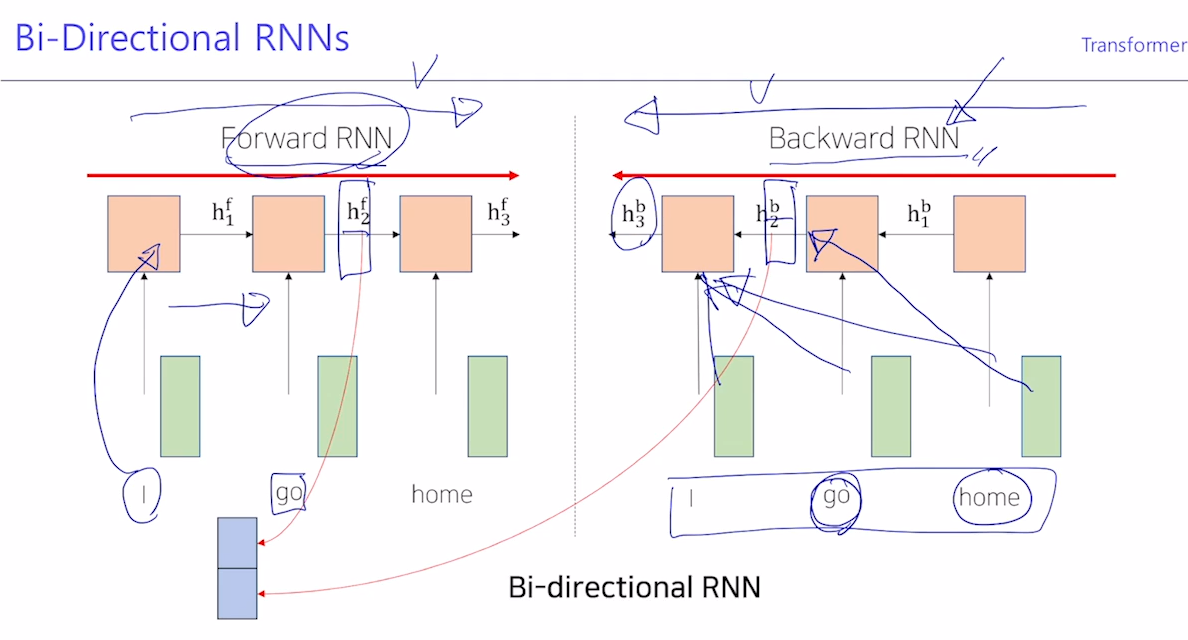
        
## Transformer 모듈의 구조
- I go home(x1, x2, x3)이 주어질때 출력으로 (h1, h2, h3)를 내보내 줌
- 중간에 어텐션은 어떻게 일어나는지?
- I 단어의 인코딩 벡터를 만든다고 가정하면, seq2seq에서 x1,x2,x3를 디코더 히든스테이트 벡터로 생각하면 됨
    - 자기자신과 내적을 하면 다른 벡터에 비해서 큰 값으로 결과가 나오고, 결국 자기자신에게 큰 비율로 결과에 반영을 하게되는 문제가 있음
        - 그래서 개선을 위해서, 자기자신을 Queries 가중치 Wq를 내적해서 다른걸로 바꾸게 됨
        - 각각 내적이 필요한 대상 어떤 정보를 가지고올 지 계산의 대상이 되는 것이 Key vector임
        - 이 유사도에서 Softmax를 취해서 비율을 정하고
        - 그 비율에 곱해서 계산해줄 Value Vector가 존재함 (Key와 연산이 필요하기 때문에 개수가 같아야 함)
        - **질문거리 : 혹시 앞에서 배운 attention 처럼 비율을 계산하는 내적 수행시 중간에 가중치 항을 넣어주면 좋지 않을까?**
        - 두번째 go를 변환 시킬때는 key랑 value는 I에서 계산한 것과 동일한 것을 사용하고 q문만 바뀌어서 계산을 하게 됨
        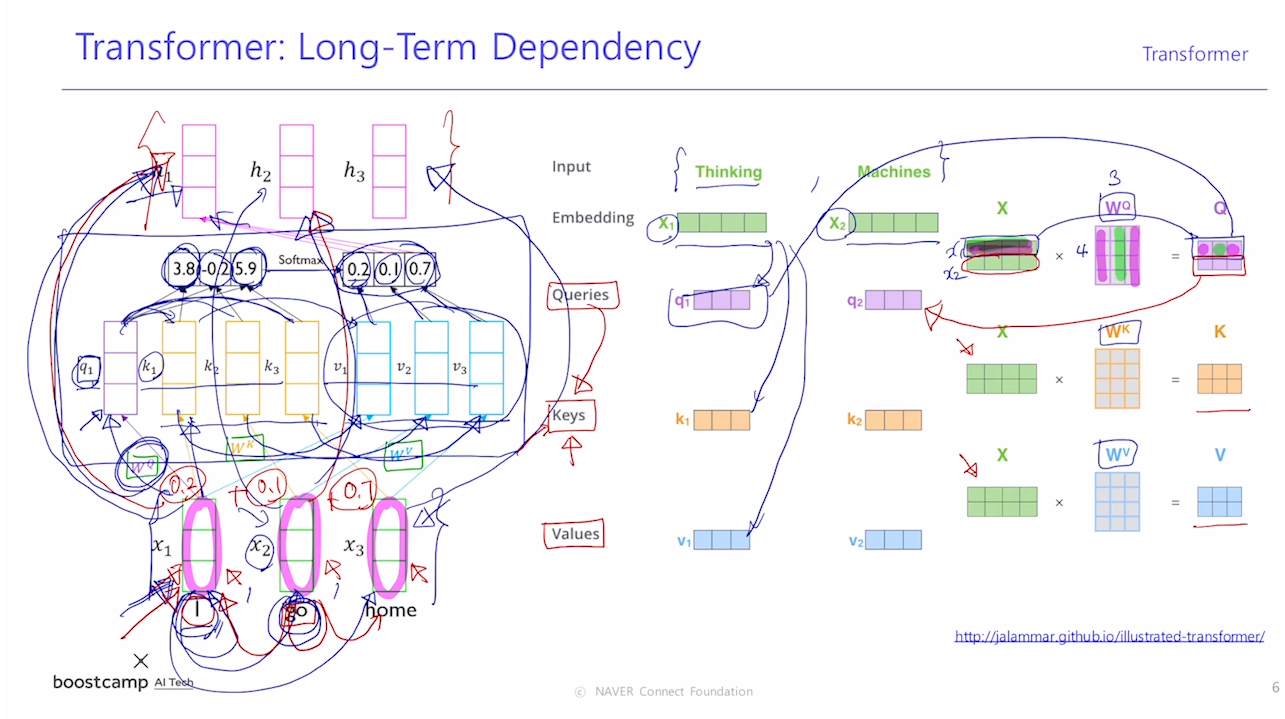
- 행렬 계산
    - 각 x1이 Wq 변환을 해서 Q 매트릭스에서 1행이 됨, x2는 Wq 변환을 거치면서 나온 Q 매트릭스에서 2행이 됨
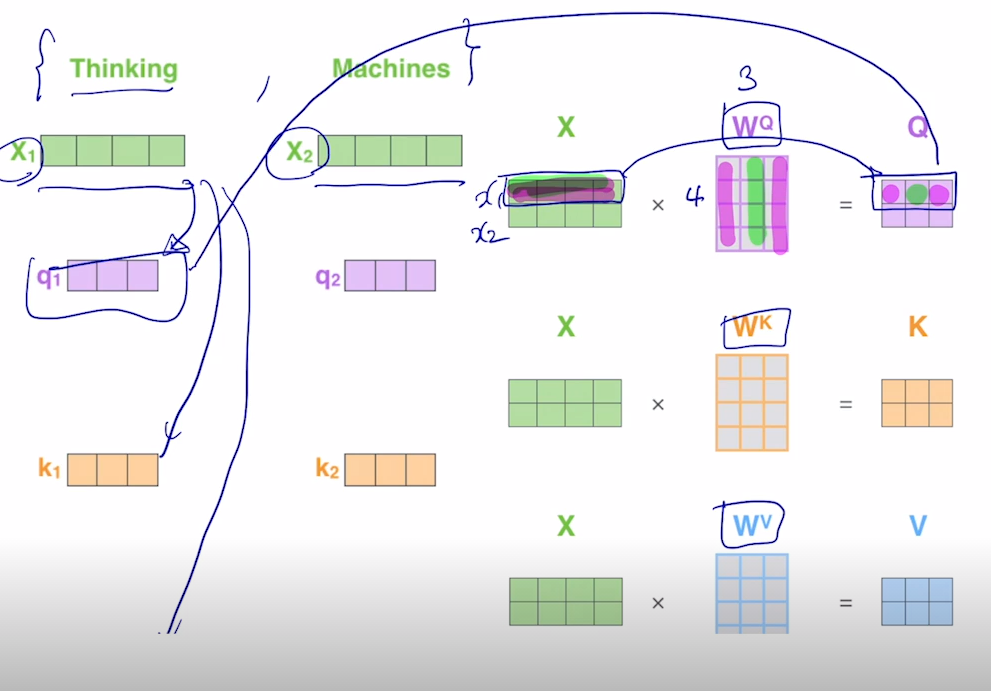
- RNN에서의 한계점 극복 부분?
    - Time step의 차이만큼 통과하면서 변질이 일어나는 한계를 근본적으로 해결함
    - 모든 X에 대해서 가중치를 두고 계산에 참여시키기 때문임

### 수식적으로 확인
- input : query q, key-value (k, v)
    - q, k 는 내적이 가능해야하기 때문에 같은 차원이어야 함
    - value는 q, k 는 내적으로 나온 softmax 확률의 곱으로 이루어짐
    - v는 차원이 꼭 같지는 않아도 됨 (얼마나 반영할지에 대한 비율 상수랑 곱해지기 때문)
- Output : value의 가중 평균 (즉, Dv 차원으로 나오게 됨)
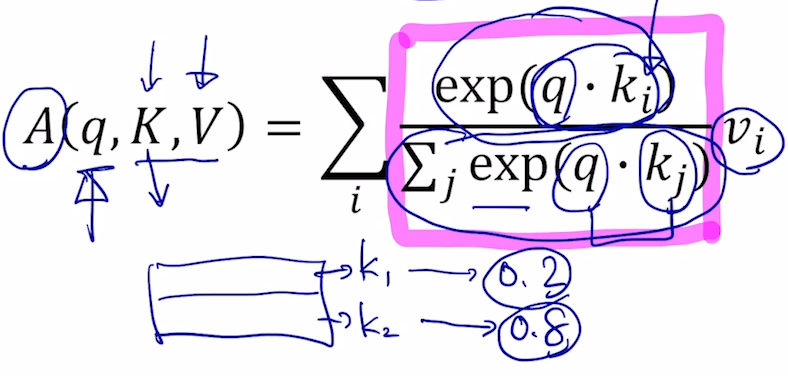

- 확장된 형태 ? Q Query matrix 형태로 주어지는 경우
     - 왜 하는 건지? : 한번에 여러 Query 넣고 결과를 뽑아내려고 하는 계산임
         - 행렬을 이용하는 것(GPU 사용)
     - 한번 실제로 Matrix 두고 Q에 대한 결과 output의 row가 의미 하는것이 맞는지 확인해보기
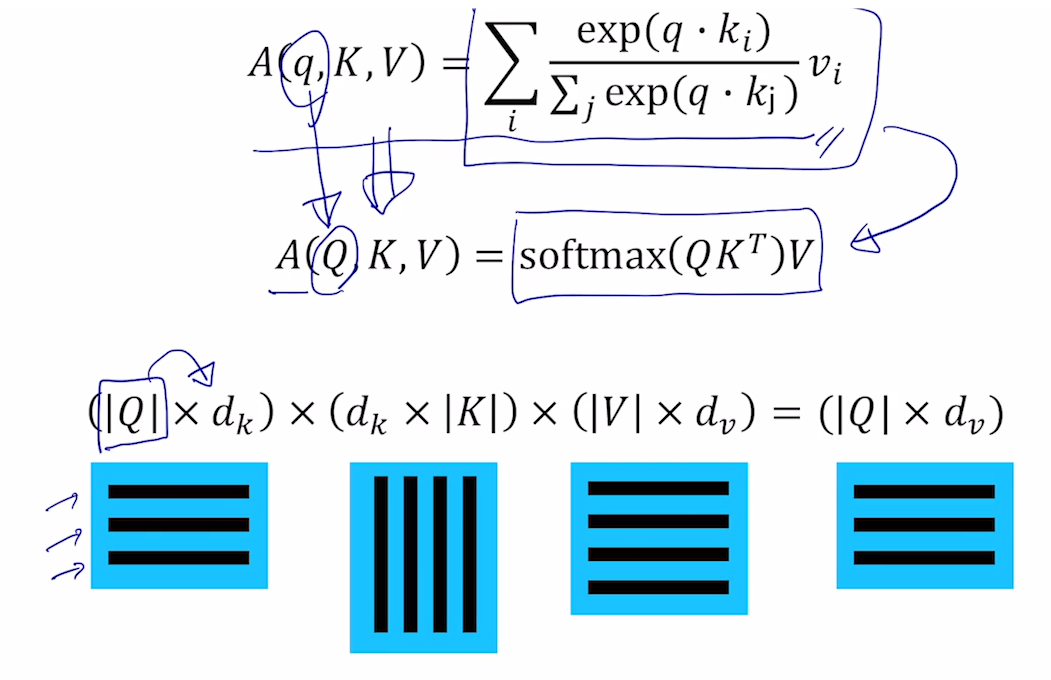
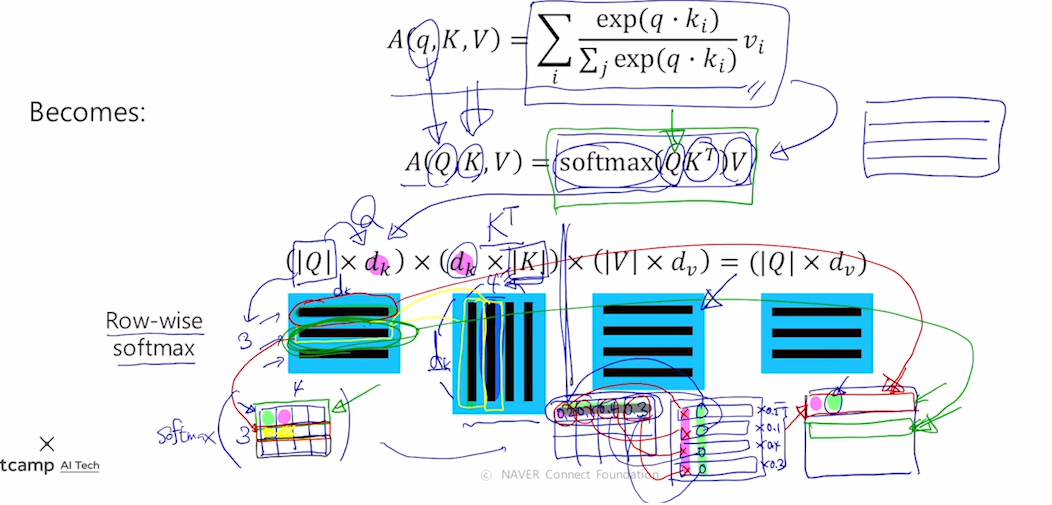
- 그림으로 다시 정리해보면!
    - 아래에서 Scaled로 나누어 주는것은 이다음 슬라이드에 설명
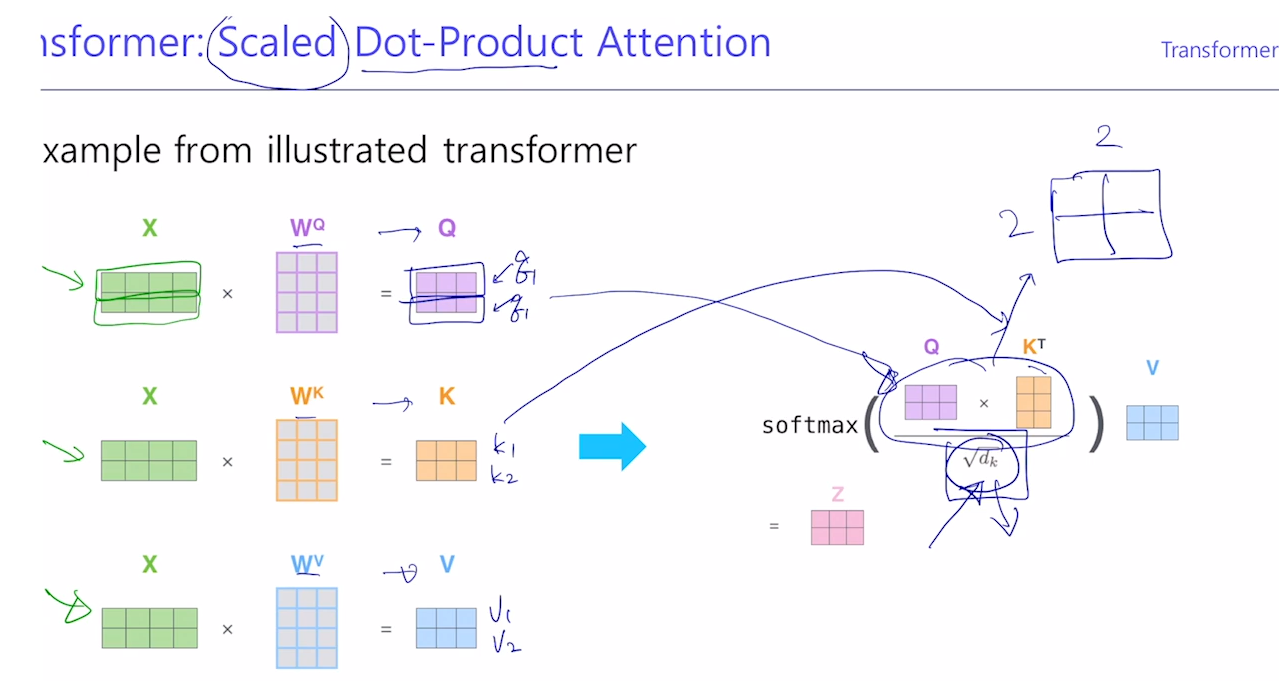
- dk의 루트로 나눠 주는것은?
    - 결국 한마디로 말하면 softmax 결과가 큰값에 너무 몰리는 것을 막기 위함 (이렇게 되면 gradient vanishing이 발생가능)
    - 아래 그림에서 ki의 x,y의 평균 분산이 1이면 최종 계산 더하기를 하면 분산은 증가하게 됨
    - 즉, k의 차원이 100이라면, 분산이 100이 되게됨, 즉 엄청 큰값과 작은값 차이가 커지게 됨
    - 이걸 각각 softmax를 주게되면, 표준편차 분산이 클수록 softmax가 큰 값에 몰리게 됨
    - 분산을 일정하게 유지시켜주기 위해서 루트 dk로 나누어 줌
    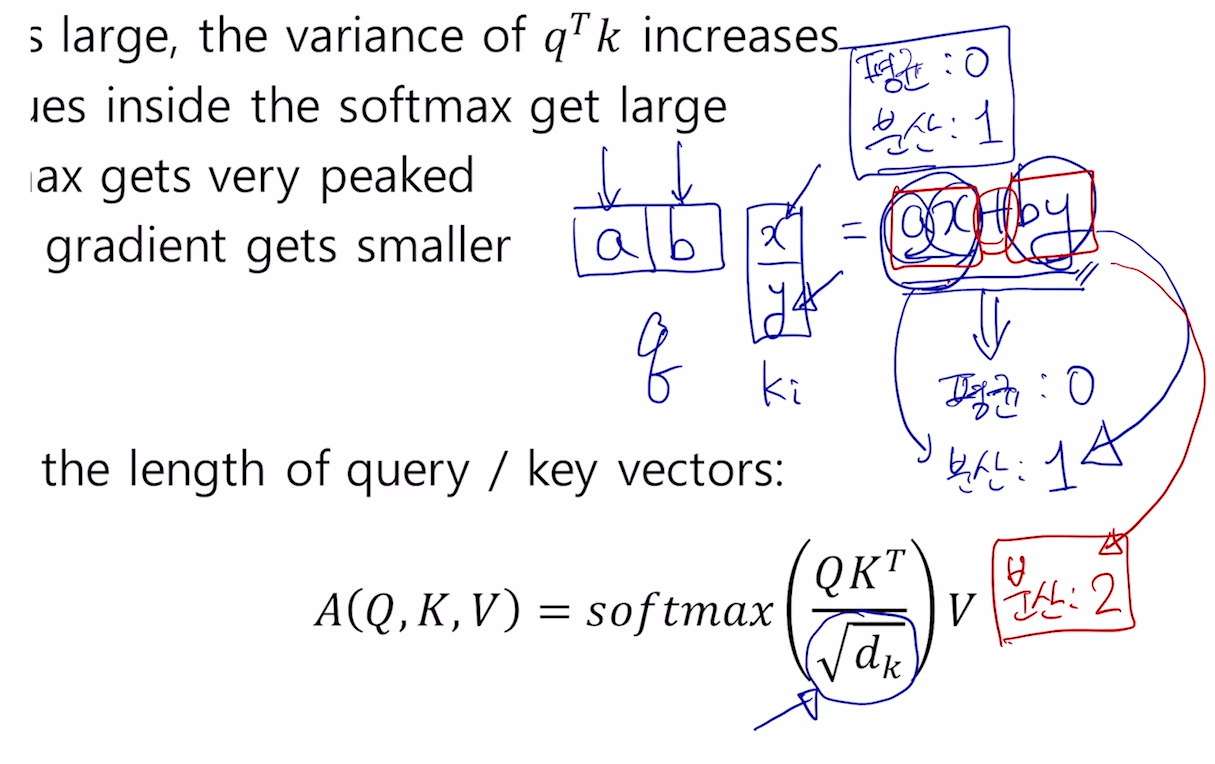
    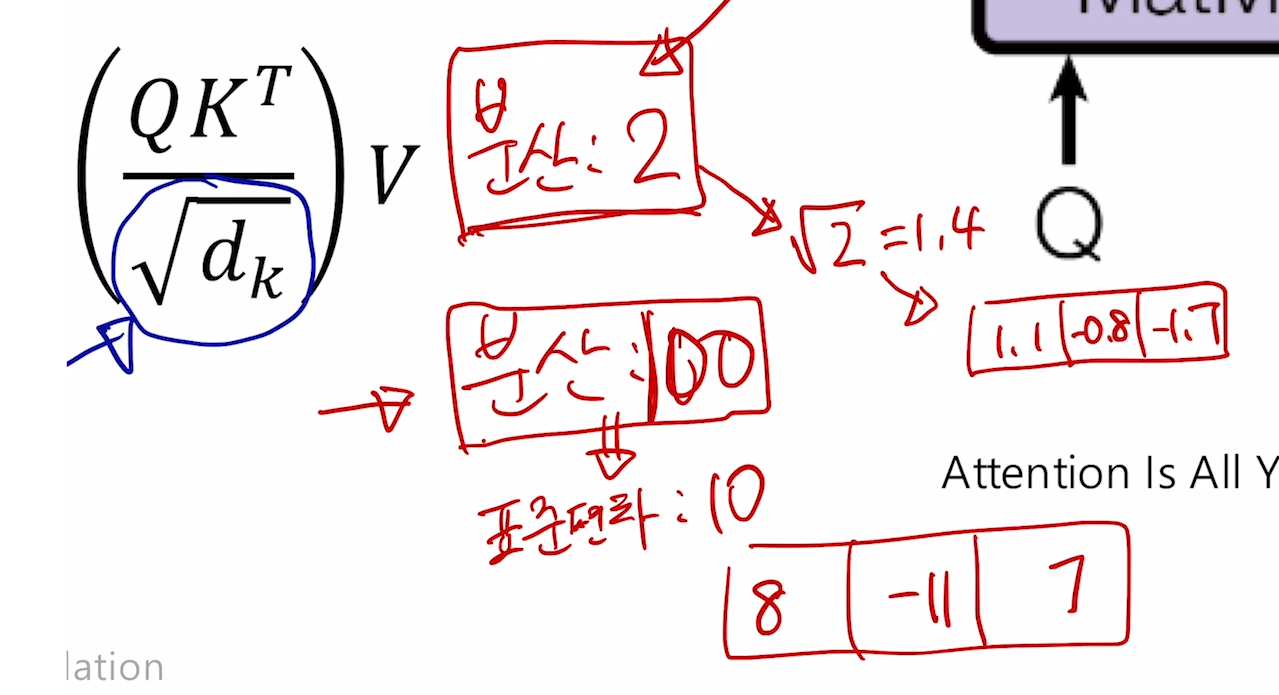